# About project
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### library


In [760]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

### Dataset
* Loading dataset: Healthcare-dataset-stroke-data

In [761]:
df = pd.read_csv('/Users/USER/Downloads/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Attribute Information

* id: unique identifier

* gender: “Male”, “Female” or “Other”

* age: age of the patient

* hypertension: 0 if the patient doesn’t have hypertension, 1 if the patient has hypertension

* heart_disease: 0 if the patient doesn’t have any heart diseases, 1 if the patient has a heart disease

* ever_married: “No” or “Yes”

* work_type: “children”, “Govt_jov”, “Never_worked”, “Private” or “Self-employed”

* Residence_type: “Rural” or “Urban”

* avg_glucose_level: average glucose level in blood

* bmi: body mass index

* smoking_status: “formerly smoked”, “never smoked”, “smokes” or “Unknown”*

* stroke: 1 if the patient had a stroke or 0 if not

###  informations about dataset

In [762]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [763]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [764]:
df.groupby("stroke")["stroke"].count()

stroke
0    4861
1     249
Name: stroke, dtype: int64

## 1-1 Data cleaning 


In [765]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Removing un-necessary sets
* In this dataset ( id ) is un-necessary set which i should remove.

In [766]:
df.drop(['id'],inplace=True, axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### missing values
#### I  fill missing data points with mean of all datas in bmi's column.

#### How many missing data points do we have?


In [767]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In this dataset exist 201 missing data points

 #### it looks like there's some missing values.

In [768]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [769]:
df.isnull().sum().sum()

0

###  Convert categorical variable into dummy/indicator variables:

In [770]:
df= pd.get_dummies(df)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


### 1-2 Correlation  between two features and between feature and target in chart and heatmap :
* As we know correlation between feature and target is good but correlation between two features is bad.

In [771]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257,0.027924,-0.027623,-0.010659,-0.679125,...,-0.078653,0.116534,0.327989,-0.634215,-0.014180,0.014180,-0.378231,0.236897,0.119307,0.073133
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904,-0.021143,0.021275,-0.004597,-0.164243,...,-0.021608,-0.005413,0.115442,-0.129506,0.007913,-0.007913,-0.141501,0.058853,0.065063,0.031240
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914,-0.085617,0.085717,-0.003343,-0.114644,...,-0.015712,0.000027,0.086760,-0.091634,-0.003092,0.003092,-0.066731,0.066804,-0.021856,0.044049
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945,-0.054902,0.054580,0.011489,-0.155068,...,-0.014675,0.016588,0.062694,-0.102250,0.004946,-0.004946,-0.095131,0.068111,0.023885,0.017646
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947,0.025797,-0.025464,-0.011802,-0.335705,...,-0.028600,0.203884,0.070822,-0.442843,0.000120,-0.000120,-0.264956,0.104257,0.106220,0.085579
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000,-0.009027,0.009117,-0.003166,-0.108340,...,-0.014882,0.011888,0.062168,-0.083869,-0.015458,0.015458,-0.055892,0.064556,-0.004129,0.008939
gender_Female,0.027924,-0.021143,-0.085617,-0.054902,0.025797,-0.009027,1.000000,-0.999597,-0.016642,-0.030483,...,-0.011469,0.032294,0.026143,-0.089120,-0.006340,0.006340,-0.059393,-0.043603,0.099111,-0.011306
gender_Male,-0.027623,0.021275,0.085717,0.054580,-0.025464,0.009117,-0.999597,1.000000,-0.011757,0.029936,...,0.011496,-0.032639,-0.025971,0.089283,0.005937,-0.005937,0.059658,0.042738,-0.098813,0.011477
gender_Other,-0.010659,-0.004597,-0.003343,0.011489,-0.011802,-0.003166,-0.016642,-0.011757,1.000000,0.019327,...,-0.000920,0.012092,-0.006112,-0.005514,0.014217,-0.014217,-0.009206,0.030568,-0.010728,-0.005978
ever_married_No,-0.679125,-0.164243,-0.114644,-0.155068,-0.335705,-0.108340,-0.030483,0.029936,0.019327,1.000000,...,0.090838,-0.153830,-0.192716,0.544441,0.006261,-0.006261,0.332081,-0.171256,-0.102845,-0.105226


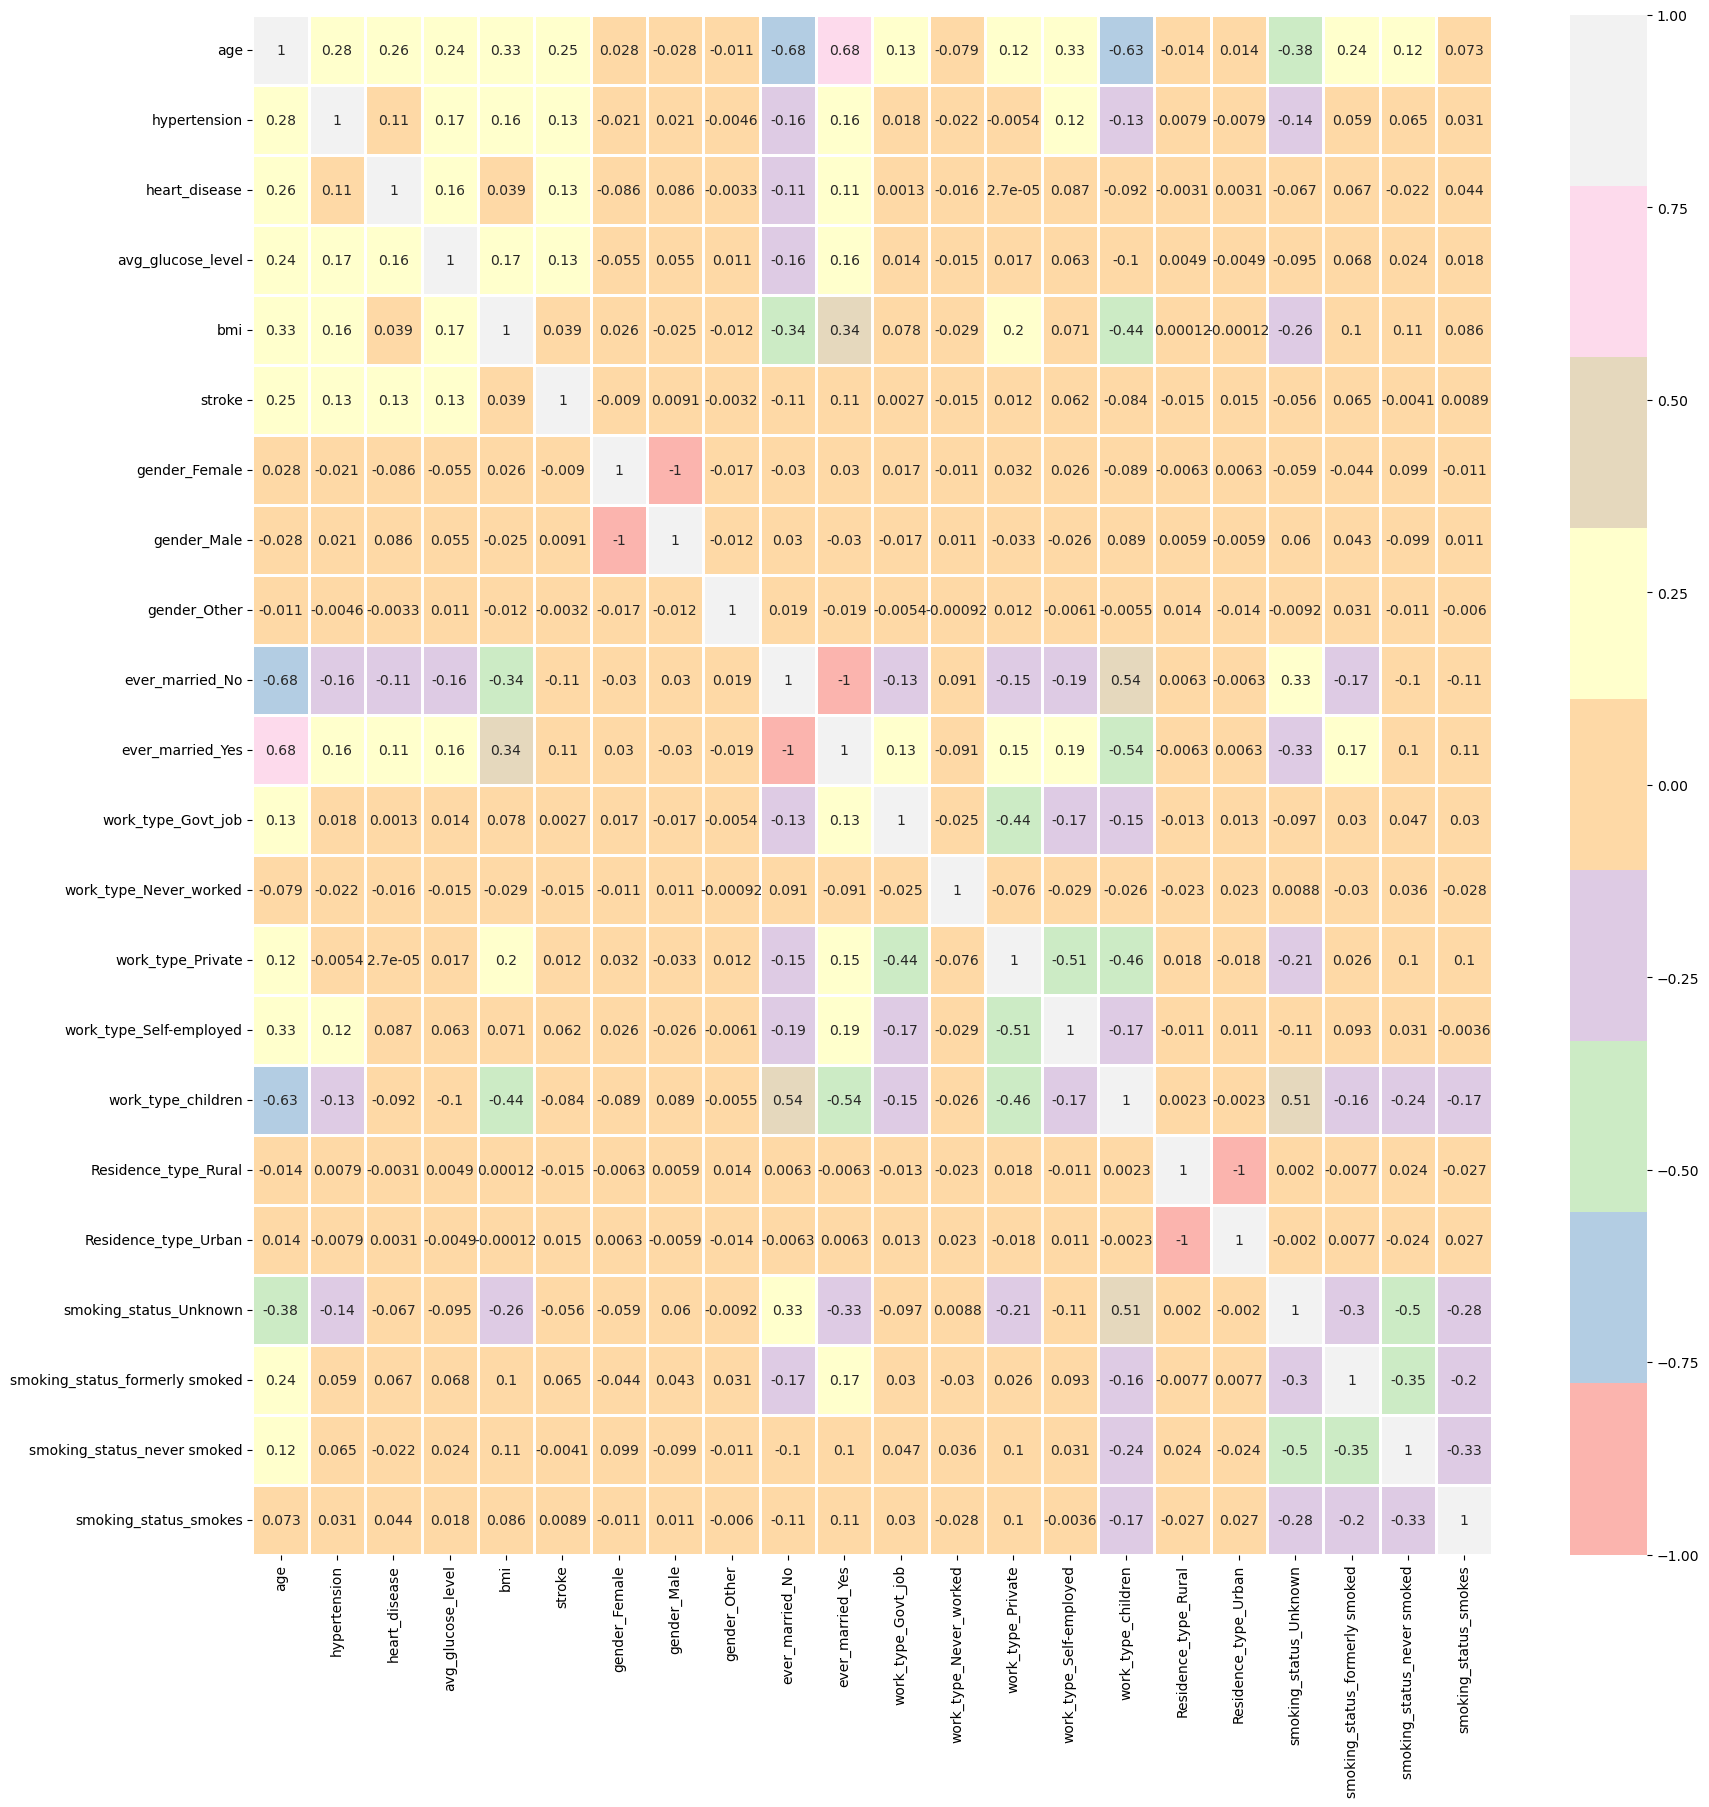

In [772]:
plt.figure(figsize=(20,20)) 
sns.heatmap(df.corr(), annot=True, cmap='Pastel1', linewidths = 2)
plt.show()

## 3-1  Review data in count and box plot

<AxesSubplot: xlabel='hypertension', ylabel='count'>

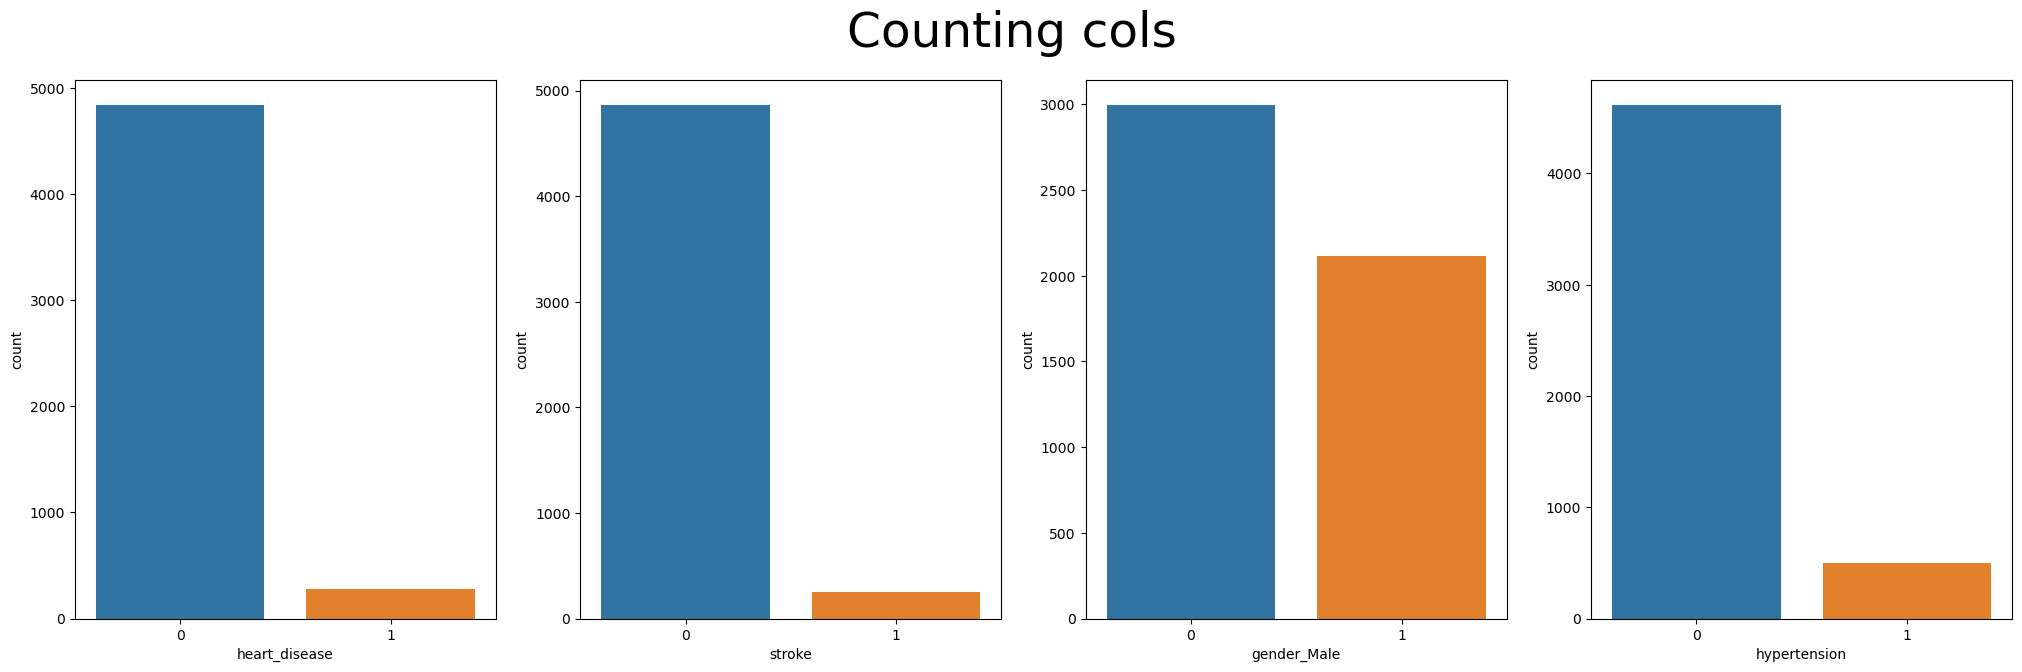

In [773]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(25,7))

fig.suptitle("Counting cols", fontsize=35)

sns.countplot(x="heart_disease", data=df,ax=ax1)
sns.countplot(x="stroke", data=df,ax=ax2)
sns.countplot(x="gender_Male", data=df,ax=ax3)
sns.countplot(x="hypertension", data=df,ax=ax4)

<AxesSubplot: xlabel='stroke', ylabel='age'>

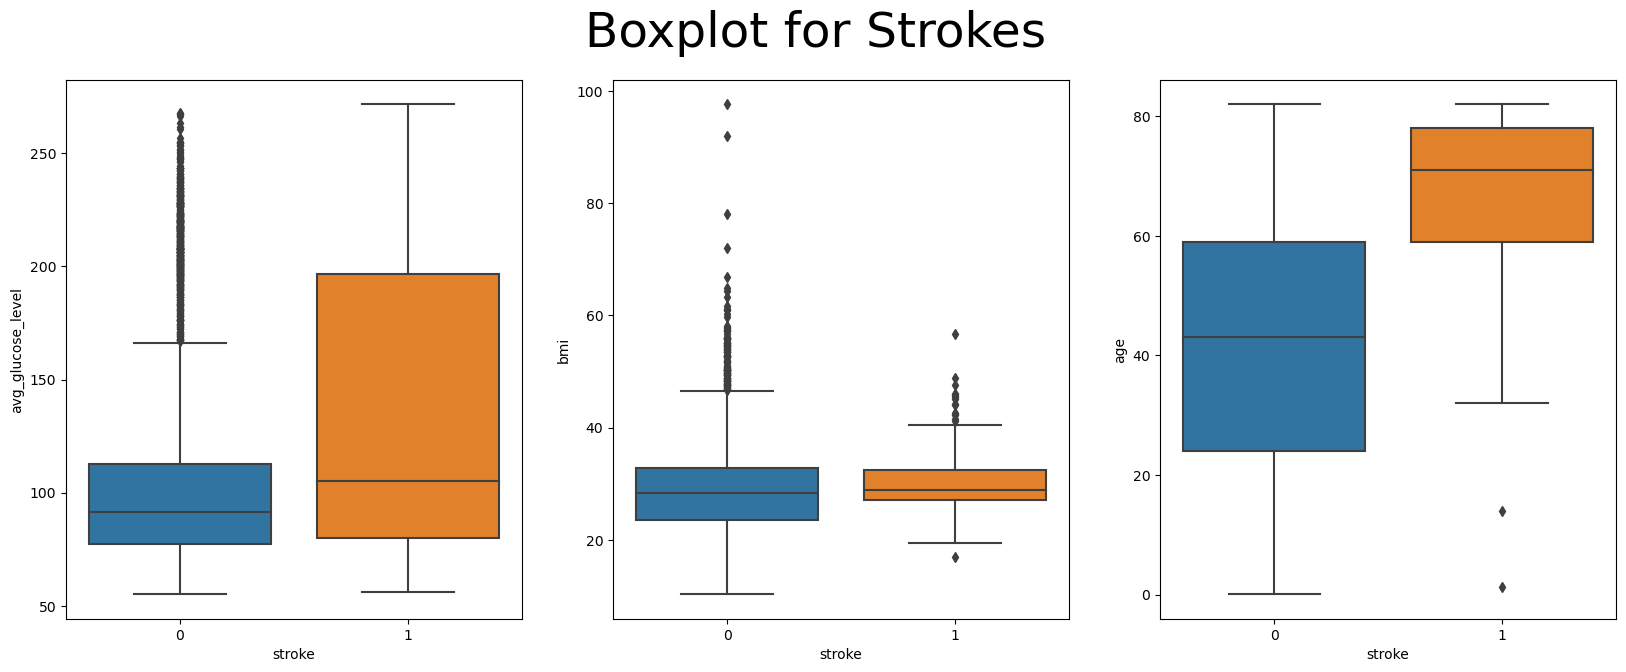

In [774]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,7))
fig.suptitle("Boxplot for Strokes", fontsize=35)

sns.boxplot(x="stroke", y="avg_glucose_level", data=df,ax=ax1)
sns.boxplot(x="stroke", y="bmi", data=df,ax=ax2)
sns.boxplot(x="stroke", y="age", data=df,ax=ax3)


## 4-1 Fitting the models and checking its accuracy

### Split Data Into Training and Testing Sets:

In [775]:
x=df.drop(["stroke"],axis=1)
y=df['stroke']

In [776]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

### Feature Scaling 

In [777]:
X_train.head(1)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2332,69.0,0,1,198.33,42.7,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [778]:
sc=StandardScaler()
X_train_prime=sc.fit_transform(X_train)
X_test_prime=sc.transform(X_test)

In [779]:
X_train_prime

array([[ 1.13576504, -0.33478104,  4.42071415, ..., -0.46119034,
        -0.76613088,  2.34945445],
       [-0.59143687, -0.33478104, -0.2262078 , ..., -0.46119034,
         1.30526001, -0.42563072],
       [-0.6357241 , -0.33478104, -0.2262078 , ..., -0.46119034,
         1.30526001, -0.42563072],
       ...,
       [ 0.2943077 , -0.33478104,  4.42071415, ..., -0.46119034,
         1.30526001, -0.42563072],
       [ 0.2943077 , -0.33478104, -0.2262078 , ..., -0.46119034,
        -0.76613088,  2.34945445],
       [ 0.64860553, -0.33478104, -0.2262078 , ...,  2.16830214,
        -0.76613088, -0.42563072]])

### Regression or classification?
Y variable that would be either stroke or no stroke is discrete therefore this problem is classification.

### Fitting The  Decision-Tree Model on the Dataset:

In [780]:
clf = DecisionTreeClassifier(max_depth=3,random_state=1234)
clf = clf.fit(X_train_prime,y_train)
y_predD1 = clf.predict(X_test_prime)

### Accuracy of The decision-tree Model(R-squared,MSE,RMSE,precision,

In [781]:
scoreD1 = clf.score(X_train_prime, y_train)
print("R-squared:", scoreD1)

mseD1 = mean_squared_error(y_test, y_predD1)
print("MSE: ", mseD1)
print("RMSE: ", mseD1**(1/2.0))  

R-squared: 0.9518101761252447
MSE:  0.050880626223091974
RMSE:  0.22556734298894415


In [782]:
accD1 = accuracy_score(y_test, y_predD1)
print('Testing-set Accuracy score is:', accD1)
print('Training-set Accuracy score is:',accuracy_score(y_train,clf.predict(X_train_prime)))

clfc = classification_report(y_test, y_predD1, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(clfc).transpose()


Testing-set Accuracy score is: 0.949119373776908
Training-set Accuracy score is: 0.9518101761252447


,precision,recall,f1-score,support
No Stroke,0.950049,0.998970,0.973896,971.000000
Stroke,0.000000,0.000000,0.000000,51.000000
accuracy,0.949119,0.949119,0.949119,0.949119
macro avg,0.475024,0.499485,0.486948,1022.000000
weighted avg,0.902639,0.949119,0.925296,1022.000000


* F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
* Support: These values simply tell us how many peoples belonged to each class in the test dataset.
* The reported averages include macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), and sample average (only for multilabel classification). Micro average (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes.

### Fitting The Logistic Regression Model on dataset:

In [783]:
log_regl1 = LogisticRegression(random_state=1234)
log_regl1 = log_regl1.fit(X_train_prime,y_train)
y_predl1 = log_regl1.predict(X_test_prime)

### Accuracy of The Logistic Regression Model 

In [784]:
scorel1 = log_regl1.score(X_train_prime, y_train)
print("R-squared:", scorel1)
msel1 = mean_squared_error(y_test, y_predl1)
print("MSE: ", msel1)
print("RMSE: ", msel1**(1/2.0))  

R-squared: 0.9518101761252447
MSE:  0.049902152641878667
RMSE:  0.2233878972591816


In [785]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accl1 = accuracy_score(y_test, y_predl1)
print('Testing-set Accuracy score is:', accl1)
print('Training-set Accuracy score is:',accuracy_score(y_train,log_regl1.predict(X_train_prime)))

baseline_report = classification_report(y_test, y_predl1, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(baseline_report).transpose()

Testing-set Accuracy score is: 0.9500978473581213
Training-set Accuracy score is: 0.9518101761252447


,precision,recall,f1-score,support
No Stroke,0.950098,1.000000,0.974410,971.000000
Stroke,0.000000,0.000000,0.000000,51.000000
accuracy,0.950098,0.950098,0.950098,0.950098
macro avg,0.475049,0.500000,0.487205,1022.000000
weighted avg,0.902686,0.950098,0.925785,1022.000000


### Fitting The K-Nearest-Neighbor(KNN) with chose K as hyperparameter on the Dataset

#### chose best k 

Minimum error:- 0.05283757338551859 at K = 8


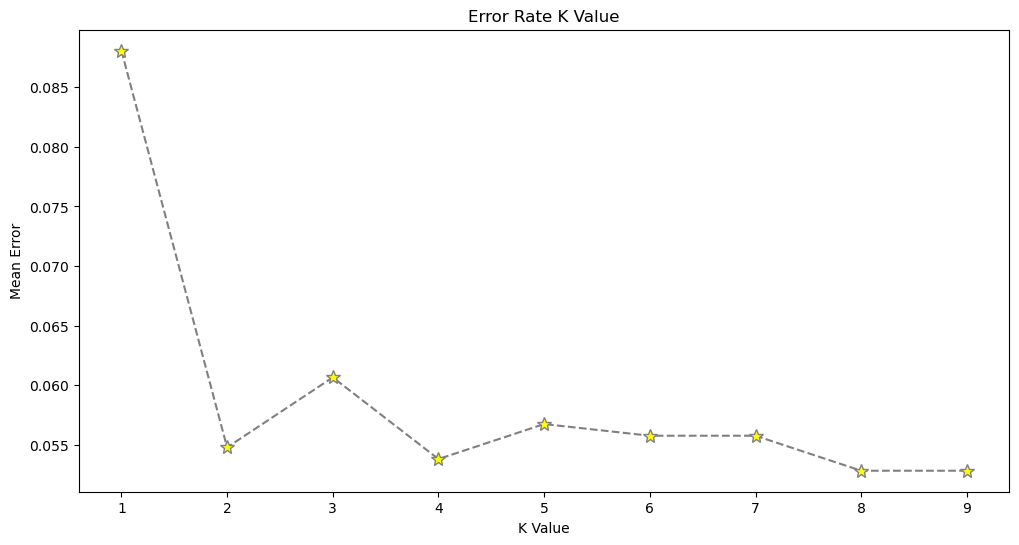

In [786]:
error = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_prime, y_train)
    pred_i = knn.predict(X_test_prime)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='grey', linestyle='dashed', marker='*',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

#### Fitting The K-Nearest-Neighbor(KNN) with chose K = 8

In [787]:
knn1= KNeighborsClassifier(n_neighbors=8)
knn1.fit(X_train_prime, y_train)
y_predKN= knn1.predict(X_test_prime) 

### Accuracy of The K-Neighbors Model  with selection k as hyperparameter:

In [788]:
scoreKN = knn1.score(X_train_prime, y_train)
print("R-squared:", scoreKN)
mseKN = mean_squared_error(y_test, y_predKN)
print("MSE: ", mseKN)
print("RMSE: ", mseKN**(1/2.0))  

R-squared: 0.9527886497064579
MSE:  0.05283757338551859
RMSE:  0.22986424990745863


In [789]:
accKN = accuracy_score(y_test, y_predKN)
print('Testing-set Accuracy score is:', accKN)
print('Training-set Accuracy score is:',accuracy_score(y_train,knn1.predict(X_train_prime)))

baseline_reportKN = classification_report(y_test, y_predKN, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(baseline_reportKN).transpose()

Testing-set Accuracy score is: 0.9471624266144814
Training-set Accuracy score is: 0.9527886497064579


,precision,recall,f1-score,support
No Stroke,0.949951,0.996910,0.972864,971.000000
Stroke,0.000000,0.000000,0.000000,51.000000
accuracy,0.947162,0.947162,0.947162,0.947162
macro avg,0.474975,0.498455,0.486432,1022.000000
weighted avg,0.902546,0.947162,0.924316,1022.000000


## 1-6 Training model with dimension reduction methods  

### Backward method

In [790]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [791]:
sfs1 = sfs(log_regl1, k_features=10, forward=False, scoring='accuracy')

In [792]:
sfs1 = sfs1.fit(x, y)

In [793]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'gender_Female', 'gender_Other', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Self-employed', 'work_type_children']


### Trainig The Logistic Regression Model

In [794]:
new_data = df[feat_names]
new_data['stroke'] = df['stroke']

new_data.head()

,age,hypertension,heart_disease,avg_glucose_level,gender_Female,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Self-employed,work_type_children,stroke
0,67.0,0,1,228.69,0,0,0,0,0,0,1
1,61.0,0,0,202.21,1,0,0,0,1,0,1
2,80.0,0,1,105.92,0,0,0,0,0,0,1
3,49.0,0,0,171.23,1,0,0,0,0,0,1
4,79.0,1,0,174.12,1,0,0,0,1,0,1


In [795]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(new_data, new_data['stroke'], test_size=0.2, random_state=1234)

In [796]:
sc=StandardScaler()
X_train_prime_b=sc.fit_transform(X_train_b)
X_test_prime_b=sc.transform(X_test_b)

In [797]:
y_train_b

2332    0
4347    0
3156    0
1564    0
12      1
       ..
664     0
3276    0
1318    0
723     0
2863    0
Name: stroke, Length: 4088, dtype: int64

In [798]:
X_test_prime_b.shape

(1022, 11)

In [799]:
log_regel2=log_regl1.fit(X_train_prime_b, y_train_b)

In [800]:
y_pred_b = log_regel2.predict(X_test_prime_b)

In [801]:
X_test_prime_b

array([[ 1.13576504, -0.33478104, -0.2262078 , ..., -0.43441645,
        -0.39012616, -0.22560971],
       [-1.34431976, -0.33478104, -0.2262078 , ..., -0.43441645,
         2.56327337, -0.22560971],
       [ 0.33859493,  2.98702697, -0.2262078 , ..., -0.43441645,
        -0.39012616, -0.22560971],
       ...,
       [-0.37000073, -0.33478104, -0.2262078 , ..., -0.43441645,
        -0.39012616, -0.22560971],
       [ 1.49006287, -0.33478104, -0.2262078 , ..., -0.43441645,
        -0.39012616, -0.22560971],
       [ 1.5343501 , -0.33478104, -0.2262078 , ..., -0.43441645,
        -0.39012616, -0.22560971]])

In [802]:
accw = accuracy_score(y_test_b, y_pred_b)
print('Testing-set Accuracy score is:', accl2)
print('Training-set Accuracy score is:',accuracy_score(y_train_b,log_regel2.predict(X_train_prime_b)))

baseline_reportl2 = classification_report(y_test_b, y_pred_b, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(baseline_reportl2).transpose()

Testing-set Accuracy score is: 1.0
Training-set Accuracy score is: 1.0


,precision,recall,f1-score,support
No Stroke,1.0,1.0,1.0,971.0
Stroke,1.0,1.0,1.0,51.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1022.0
weighted avg,1.0,1.0,1.0,1022.0


In [803]:
y_test_b

3716    0
3129    0
3730    0
1610    0
3512    0
       ..
3623    0
2461    0
2392    0
1634    0
3428    0
Name: stroke, Length: 1022, dtype: int64

In [804]:
y_pred_b==y_test_b

3716    True
3129    True
3730    True
1610    True
3512    True
        ... 
3623    True
2461    True
2392    True
1634    True
3428    True
Name: stroke, Length: 1022, dtype: bool

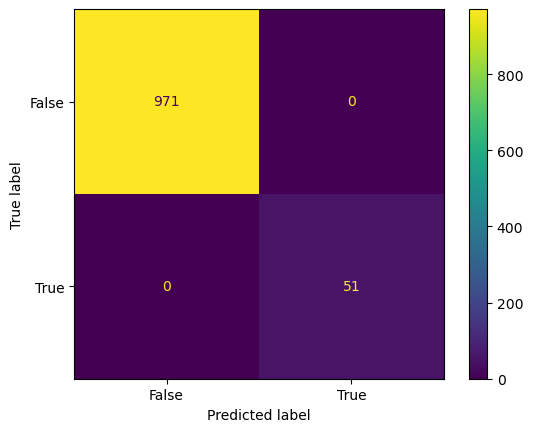

F1_score= 1.0


In [805]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_b)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
F1_score = metrics.f1_score(y_test, y_pred_b)
print('F1_score=',F1_score)

### The Logistic Regression Model on all features

Testing-set Accuracy score is: 0.9500978473581213

Training-set Accuracy score is: 0.9518101761252447

### The Logistic Regression Model on Backward features selection

Testing-set Accuracy score is: 1.0

Training-set Accuracy score is: 1.0

### Forward method

In [806]:
sfs2 = sfs(clf, k_features=10, forward=True, scoring='accuracy')


In [807]:
sfs2 = sfs2.fit(x, y)

In [808]:
feat_names_2 = list(sfs2.k_feature_names_)
print(feat_names_2)

['age', 'hypertension', 'heart_disease', 'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked']


### Trainig The The  Decision-Tree Model 

In [809]:
new_data_2 = dm[feat_names_2]
new_data_2['stroke'] = dm['stroke']

new_data_2.head()

,age,hypertension,heart_disease,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,stroke
0,67.0,0,1,0,1,0,0,1,0,0,1
1,61.0,0,0,1,0,0,0,1,0,0,1
2,80.0,0,1,0,1,0,0,1,0,0,1
3,49.0,0,0,1,0,0,0,1,0,0,1
4,79.0,1,0,1,0,0,0,1,0,0,1


In [810]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(new_data_2, new_data_2['stroke'], test_size=0.2, random_state=1234)

In [811]:
sc=StandardScaler()
X_train_prime_f=sc.fit_transform(X_train_f)
X_test_prime_f=sc.transform(X_test_f)

In [812]:
X_train_prime_f

array([[ 1.13576504, -0.33478104,  4.42071415, ..., -0.38970985,
        -0.05648171, -0.22560971],
       [-0.59143687, -0.33478104, -0.2262078 , ..., -0.38970985,
        -0.05648171, -0.22560971],
       [-0.6357241 , -0.33478104, -0.2262078 , ..., -0.38970985,
        -0.05648171, -0.22560971],
       ...,
       [ 0.2943077 , -0.33478104,  4.42071415, ..., -0.38970985,
        -0.05648171, -0.22560971],
       [ 0.2943077 , -0.33478104, -0.2262078 , ..., -0.38970985,
        -0.05648171, -0.22560971],
       [ 0.64860553, -0.33478104, -0.2262078 , ...,  2.56601161,
        -0.05648171, -0.22560971]])

In [813]:
clff = DecisionTreeClassifier(max_depth=3)
clff = clf.fit(X_train_prime_f,y_train_f)
y_pred_f = clff.predict(X_test_prime_f)

In [814]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Simple model report
accw = accuracy_score(y_test_f, y_pred_f)
print('Testing-set Accuracy score is:', accw)
print('Training-set Accuracy score is:',accuracy_score(y_train_f,clff.predict(X_train_prime_f)))

clfe = classification_report(y_test_f, y_pred_f, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(clfe).transpose()

Testing-set Accuracy score is: 1.0
Training-set Accuracy score is: 1.0


,precision,recall,f1-score,support
No Stroke,1.0,1.0,1.0,971.0
Stroke,1.0,1.0,1.0,51.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1022.0
weighted avg,1.0,1.0,1.0,1022.0


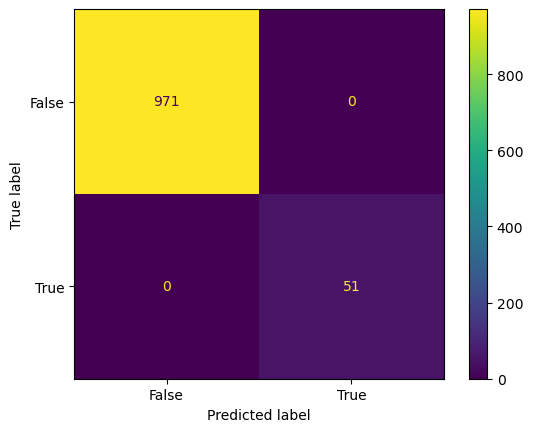

F1_score= 1.0


In [815]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_f)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
F1_score = metrics.f1_score(y_test, y_pred_f)
print('F1_score=',F1_score)

### Decision-Tree on all features

Testing-set Accuracy score is: 0.949119373776908

Training-set Accuracy score is: 0.9518101761252447

### Decision-Tree on forward features selection

Testing-set Accuracy score is: 1.0

Training-set Accuracy score is: 1.0

## 1-7 Optimal K for The K-Fold Crossvalidation Method

In [816]:
# pipeline:when we want to perform operations step by step on data, we can make a pipeline of all the estimators in sequence.
pipeline = make_pipeline(StandardScaler(), knn1)
hkfold = KFold(n_splits=10)
kfold = hkfold.split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.6f' % (k+1, np.bincount(y_train.iloc[train]), score))

Fold:  1, Training/Test Split Distribution: [3503  176], Accuracy: 0.946210
Fold:  2, Training/Test Split Distribution: [3500  179], Accuracy: 0.953545
Fold:  3, Training/Test Split Distribution: [3497  182], Accuracy: 0.960880
Fold:  4, Training/Test Split Distribution: [3507  172], Accuracy: 0.938875
Fold:  5, Training/Test Split Distribution: [3499  180], Accuracy: 0.958435
Fold:  6, Training/Test Split Distribution: [3500  179], Accuracy: 0.951100
Fold:  7, Training/Test Split Distribution: [3505  174], Accuracy: 0.941320
Fold:  8, Training/Test Split Distribution: [3491  188], Accuracy: 0.975550
Fold:  9, Training/Test Split Distribution: [3508  172], Accuracy: 0.936275
Fold: 10, Training/Test Split Distribution: [3500  180], Accuracy: 0.955882


* K=8 is optimal K for The K-Fold Crossvalidation Method

## 1-8 Bootstrap usage

### Removing 80% of features randomly

In [817]:
from numpy.random import default_rng

arr_indices_top_drop = default_rng().choice(dm.index, size=4088, replace=False)
ds=dm.drop(index=arr_indices_top_drop)
ds

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
10,81.0,1,0,80.43,29.7,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
15,50.0,1,0,167.41,30.9,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
20,71.0,0,0,193.94,22.4,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
21,52.0,1,0,233.29,48.9,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
22,79.0,0,0,228.70,26.6,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5087,63.0,0,0,75.93,34.7,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
5088,64.0,1,0,76.89,30.2,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
5090,26.0,0,0,100.85,21.0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
5094,13.0,0,0,82.38,24.3,0,0,1,0,1,...,0,0,0,1,0,1,1,0,0,0


### Resampeling with The Bootstrap Method

In [818]:
from sklearn.utils import resample
boot = resample(ds, replace=True, n_samples=4088, random_state=1234)

In [819]:
boot

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4045,37.0,0,0,156.69,35.200000,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3604,36.0,0,0,71.32,43.900000,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1427,25.0,0,0,78.29,28.893237,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
236,57.0,0,0,86.30,31.700000,1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
981,46.0,0,0,109.22,20.100000,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,41.0,0,0,71.06,23.400000,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3927,62.0,0,0,88.32,36.300000,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3158,16.0,0,0,95.38,34.300000,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4586,53.0,0,0,85.46,30.000000,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [820]:
frames = [ds, boot]

result = pd.concat(frames)

* Merging ds=20% of features and boot = 80% of resampeling features with The Bootstrap Method

In [821]:
result

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
10,81.0,1,0,80.43,29.7,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
15,50.0,1,0,167.41,30.9,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
20,71.0,0,0,193.94,22.4,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
21,52.0,1,0,233.29,48.9,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
22,79.0,0,0,228.70,26.6,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,41.0,0,0,71.06,23.4,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3927,62.0,0,0,88.32,36.3,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3158,16.0,0,0,95.38,34.3,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4586,53.0,0,0,85.46,30.0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [822]:
x233=result.drop(["stroke"],axis=1)
y233=result['stroke']

In [823]:
X_train233, X_test233, y_train233, y_test233 = train_test_split(x233, y233, test_size=0.2, random_state=1234)

In [824]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_prime233=sc.fit_transform(X_train233)
X_test_prime233=sc.transform(X_test233)

In [825]:
log_regl1.fit(X_train_prime233,y_train233)
y_predl1233 = log_regl1.predict(X_test_prime233)

In [826]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accl1233 = accuracy_score(y_test233, y_predl1233)
print('Testing-set Accuracy score is:', accl1233)
print('Training-set Accuracy score is:',accuracy_score(y_train233,log_regl1.predict(X_train_prime233)))

baseline_report233 = classification_report(y_test233, y_predl1233, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(baseline_report233).transpose()

Testing-set Accuracy score is: 0.9500978473581213
Training-set Accuracy score is: 0.9452054794520548


,precision,recall,f1-score,support
No Stroke,0.950098,1.000000,0.974410,971.000000
Stroke,0.000000,0.000000,0.000000,51.000000
accuracy,0.950098,0.950098,0.950098,0.950098
macro avg,0.475049,0.500000,0.487205,1022.000000
weighted avg,0.902686,0.950098,0.925785,1022.000000


#### resample bootstrap result

Testing-set Accuracy score is: 0.9579256360078278

Training-set Accuracy score is: 0.9510763209393346

#### orginal data result

Testing-set Accuracy score is: 0.9403131115459883

Training-set Accuracy score is: 0.9537671232876712

## 2-1 PCA method and its 2D , 3D Plot


### 2D Plot

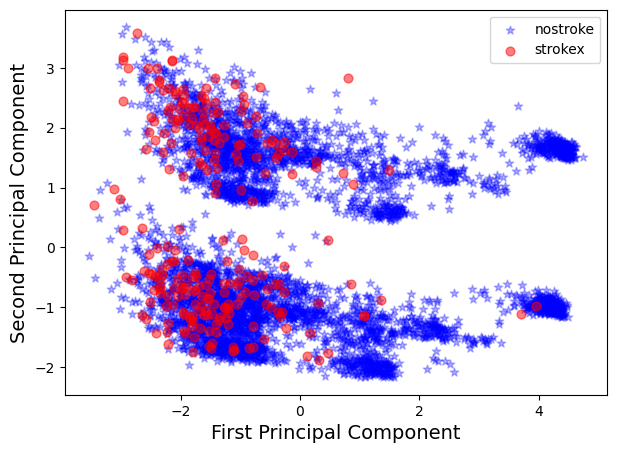

In [827]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook
scaler=StandardScaler()
scaler.fit(x) 
X_scaled=scaler.transform(x)
pca=PCA(n_components=2)
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 
Xax=X_pca[:,0]
Yax=X_pca[:,1]
cdict={0:'blue',1:'red'}
labl={0:'nostroke',1:'strokex'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(y):
    ix=np.where(y==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

### 3D Plot

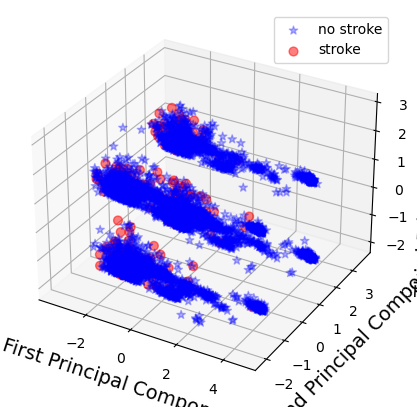

In [828]:
scaler = StandardScaler()
scaler.fit(x) 
X_scaled = scaler.transform(x)

pca = PCA(n_components=3)
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) 

Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {0:'blue',1:'red'}
labl = {0:'no stroke',1:'stroke'}
marker = {0:'*',1:'o'}
alpha = {0:.3, 1:.5}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])

ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

### Fitting PCA method(PC1,PC2)

In [829]:
pca1 = PCA(n_components = 2)
pca1.fit(X_train_prime,y_train)
data_pca21 = pca.transform(X_train_prime)
data_pca22 = pca.transform(X_test_prime)
clfp = DecisionTreeClassifier(max_depth=3,random_state=1234)
clfp = clfp.fit(data_pca21,y_train)

In [830]:
y_pred_testpc =clfp.predict(data_pca22)
accpc = accuracy_score(y_test, y_pred_testpc)
print('Testing-set Accuracy score is:', accpc)
print('Training-set Accuracy score is:',accuracy_score(y_train,clfp.predict(data_pca21)))

knncc = classification_report(y_test, y_pred_testpc, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(knncc).transpose()

Testing-set Accuracy score is: 0.949119373776908
Training-set Accuracy score is: 0.9527886497064579


,precision,recall,f1-score,support
No Stroke,0.950049,0.998970,0.973896,971.000000
Stroke,0.000000,0.000000,0.000000,51.000000
accuracy,0.949119,0.949119,0.949119,0.949119
macro avg,0.475024,0.499485,0.486948,1022.000000
weighted avg,0.902639,0.949119,0.925296,1022.000000


### Fitting PCA method(PC1,PC2,PC3)

In [831]:
pca2 = PCA(n_components = 3)
pca2.fit(X_train_prime,y_train)
data_pca31 = pca.transform(X_train_prime)
data_pca32 = pca.transform(X_test_prime)
clfpp = DecisionTreeClassifier(max_depth=3,random_state=1234)
clfpp = clfpp.fit(data_pca31,y_train)

In [832]:
y_pred_testpc2 =clfpp.predict(data_pca32)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accpc2 = accuracy_score(y_test, y_pred_testpc2)
print('Testing-set Accuracy score is:', accpc2)
print('Training-set Accuracy score is:',accuracy_score(y_train,clfpp.predict(data_pca31)))

knncc = classification_report(y_test, y_pred_testpc2, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(knncc).transpose()

Testing-set Accuracy score is: 0.949119373776908
Training-set Accuracy score is: 0.9527886497064579


,precision,recall,f1-score,support
No Stroke,0.950049,0.998970,0.973896,971.000000
Stroke,0.000000,0.000000,0.000000,51.000000
accuracy,0.949119,0.949119,0.949119,0.949119
macro avg,0.475024,0.499485,0.486948,1022.000000
weighted avg,0.902639,0.949119,0.925296,1022.000000


## 2-2 Clustering

### kmeans clustering method

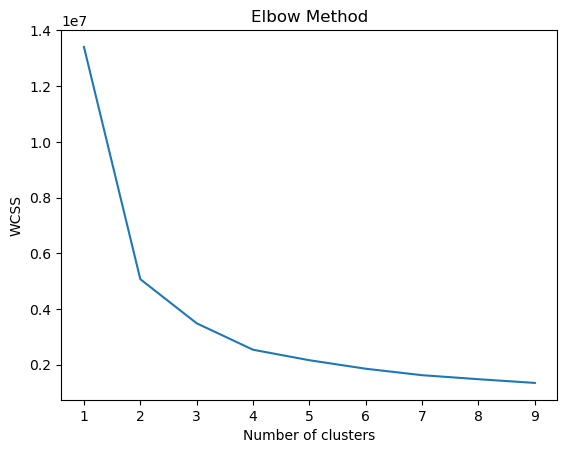

In [833]:
from sklearn.cluster import KMeans
import numpy as nm    

import matplotlib.pyplot as mtp    

import pandas as pd    
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=1234)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* The Elbow plot decreased rapidly at first and starts to flattens out later as k clusters increases. It shows that model complexities will start outweighing any incremental gains

* The Elbow test resulted in an optimal cluster of 4 in this case.

In [834]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 1234)  

y_predictkm= kmeans.fit_predict(x) 


In [835]:
correct_labels = sum(y == y_predictkm)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 1343 out of 5110 samples were correctly labeled.


In [836]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.26


### Evaluation Metrics For Clustering-Based Models
#### Silhouette Score
* The silhouette score is a metric used to calculate the goodness of fit of a clustering algorithm, but can also be used as a method for determining an optimal value of k .
* It is calculated by taking the mean distance from intra-cluster and nearest cluster samples.
* Its value ranges from -1 to 1.
* A value of 0 indicates clusters are overlapping and either the data or the value of k is incorrect.
* 1 is the ideal value and indicates that clusters are very dense and nicely separated.
* A negative value indicates elements have likely been assigned to the wrong clusters.
* The closer the value of the silhouette score to 1 the better-separated the clusters.

In [837]:
silhouette_score(x,y_predictkm)

0.359175525632981

#### Calinski Harabaz Index
* It is also known as the Variance Ratio Criterion.
* Calinski Harabaz Index is defined as the ratio of the sum of between-cluster dispersion and of within-cluster dispersion.
* The higher the index the more separable the clusters.

In [838]:
calinski_harabasz_score(x,y_predictkm)

6654.463416073808

#### Davies Bouldin index
* The Davies–Bouldin index (DBI), introduced by David L. Davies and Donald W. Bouldin in 1979, is another metric for evaluating clustering algorithms.
* The Davies Bouldin index is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.
* The minimum value of the DB Index is 0, whereas a smaller value (closer to 0) represents a better model that produces better clusters.

In [839]:
davies_bouldin_score(x,y_predictkm)

0.8938377903048261

In [840]:
accq=accuracy_score(y, y_predictkm)
print("Accuracy score is", accq)

Accuracy score is 0.2628180039138943


#### Based on the above evaluation scores, it can be concluded that our model does not perform well.

## 3-1 Checking the normality of a column using statistical tests and QQ-Plot

#### Shapiro-Wilk Test
* The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution.

In [841]:
from scipy.stats import shapiro
shapiro(df['age'])
stat, p = shapiro(df['age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.967, p=0.000
Sample does not look Gaussian (reject H0)


#### QQ-plot

((array([-3.6412931, -3.4063133, -3.2768215, ...,  3.2768215,  3.4063133,
          3.6412931]),
  array([8.0e-02, 8.0e-02, 1.6e-01, ..., 8.2e+01, 8.2e+01, 8.2e+01])),
 (22.256923058913664, 43.226614481409, 0.9837210819944497))

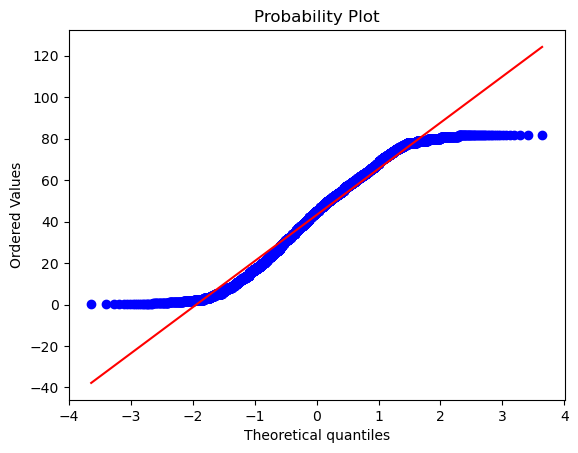

In [842]:
import scipy.stats as stats
import matplotlib.pyplot as plt
df1 = df[['age']]
# use scipy.stats to plot against a norm
stats.probplot(df['age'], dist="norm", plot=plt)

* As we can see, the sample quantiles are quite different from the theoretical quantiles, because the blue points are very far from the red line.

## 2-3 Chi-Square Test
* chi2: The test statistic
* p: The p-value of the test
* dof: Degrees of freedom
* expected: The expected frequencies, based on the marginal sums of the table

In [843]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import pandas as pd
data = df[['age','hypertension']]
print(data)
stat, p, dof, expected = chi2_contingency(data)
# interpret test-statistic
prob = 0.90
chi = chi2.ppf(prob, dof)
chi

       age  hypertension
0     67.0             0
1     61.0             0
2     80.0             0
3     49.0             0
4     79.0             1
...    ...           ...
5105  80.0             1
5106  81.0             0
5107  35.0             0
5108  51.0             0
5109  44.0             0

[5110 rows x 2 columns]


5238.965215568685

In [844]:
if abs(stat) >= chi:
    print('reject Ho:H1')
else:
    print('fail to reject Ho:H0')

fail to reject Ho:H0


* H0 : The two categorical variables have no relationship (independent)
* H1 : There is a relationship (dependent) between two categorical variables 

## 3-3 Cheak distributions of one column

In [845]:
pip install fitter

In [846]:
conda install fitter

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - fitter

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  6.82it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,0.002620,1374.535441,-73975.995351,inf,0.024792,3.676419e-03
lognorm,0.003070,1598.462095,-73175.365130,inf,0.031739,6.605360e-05
gamma,0.003135,1704.620632,-73068.275838,inf,0.031225,9.196902e-05
beta,0.003174,1691.001854,-72997.297116,inf,0.032522,3.945490e-05
norm,0.003961,2727.489010,-71882.199227,inf,0.073238,2.787359e-24


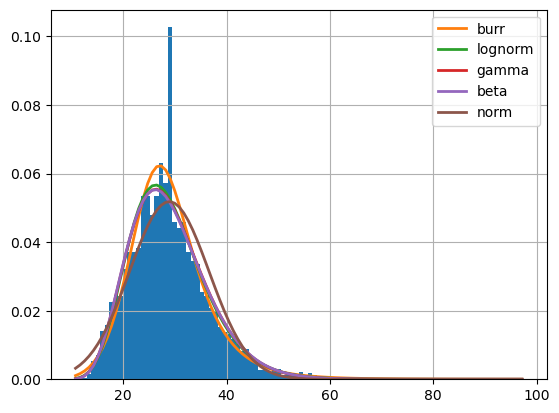

In [847]:
from fitter import Fitter
f = Fitter(df['bmi'],distributions=['gamma','lognorm',"beta","burr", "norm"])
f.fit()
f.summary()

Note that kind=’kde’ tells pandas to use kernel density estimation, which produces a smooth curve that summarizes the distribution of values for a variable.

If you’d like to create a histogram instead, you can specify kind=’hist’ as follows:

In [848]:
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 7.1063852434806645,
  'd': 0.9190140699513585,
  'loc': -0.14913754224803652,
  'scale': 28.672439885448348}}

This method uses bars to represent frequencies of values in the points column as opposed to a smooth line that summarizes the shape of the distribution

## 2-3 Answer Question about  dataset

### Normalize numerical attributes

In [849]:
# Create a new column for normalized age
df['age_norm']=(df['age']-df['age'].min())/(df['age'].max()-df['age'].min())
# Create a new column for normalized bmi
df['bmi_norm']=(df['bmi']-df['bmi'].min())/(df['bmi'].max()-df['bmi'].min())

#### Discretize  age and bmi attributes  

In [850]:
# Discretize with respective equal-width bin
df['age_binned'] = pd.cut(df['age'], np.arange(0, 91, 5))
df['bmi_binned'] = pd.cut(df['bmi'], np.arange(0, 101, 5))

#### For numerical attributes, histogram was plotted to discover any potential relationship between the variable and stroke. A function was created to avoid duplication of codes. It takes in the name of the column and outputs the histogram.

In [851]:
def get_stacked_bar_chart(column):
    # Get the count of records by column and stroke    
    df_pct = df.groupby([column, 'stroke'])['age'].count()
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()    
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=1);

#### In addition, 100% stacked bar charts were plotted to discover any potential relationship between the variable and stroke. With little tweak, a new yet similar function was created to avoid duplication of codes. It takes in the name of the column and outputs the 100% stacked bar chart.

In [852]:
def get_100_percent_stacked_bar_chart(column, width = 0.5):
    # Get the count of records by column and stroke
    df_breakdown = df.groupby([column, 'stroke'])['age'].count()
    # Get the count of records by gender
    df_total = df.groupby([column])['age'].count()
    # Get the percentage for 100% stacked bar chart
    df_pct = df_breakdown / df_total * 100
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=width);

### 1-What is the effect of age on stroke?

<AxesSubplot: xlabel='age_binned'>

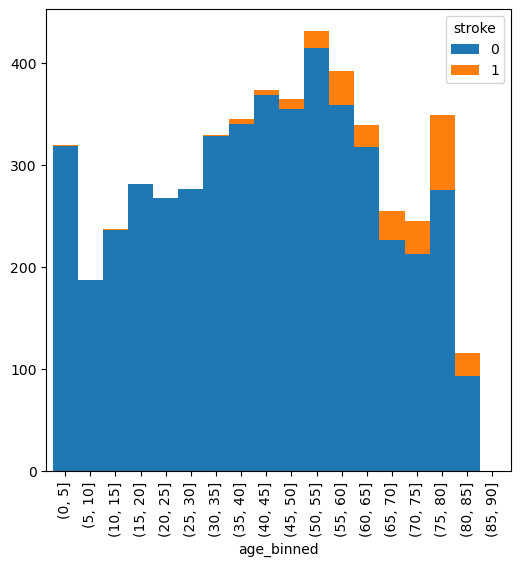

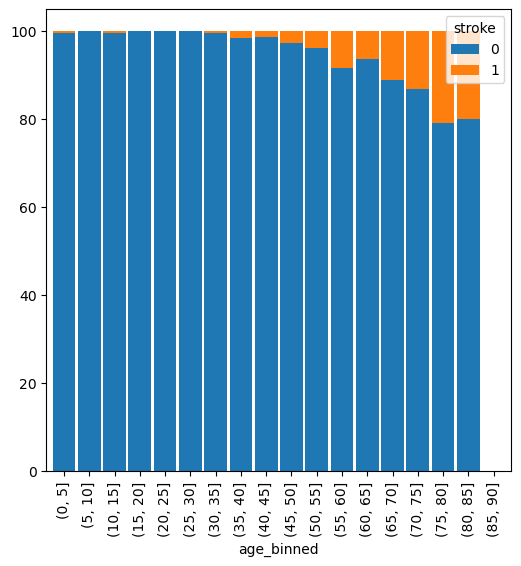

In [853]:
get_stacked_bar_chart('age_binned')
get_100_percent_stacked_bar_chart('age_binned', width = 0.9)

### The risk of stroke increases as age increases.

### In what range of BMI, the probability of stroke is higher?

<AxesSubplot: xlabel='bmi_binned'>

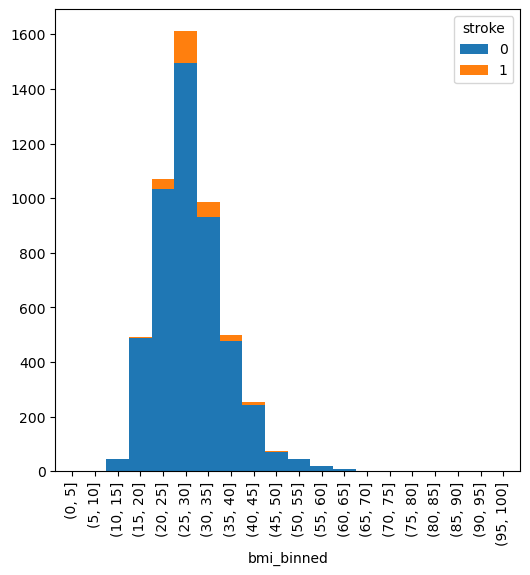

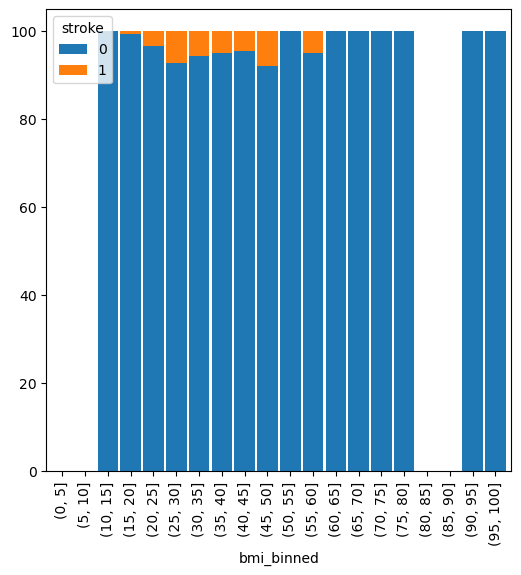

In [854]:
get_stacked_bar_chart('bmi_binned')
get_100_percent_stacked_bar_chart('bmi_binned', width = 0.9)

### The probability of stroke is higher in patients who had BMI between 25 and 35.